<ipython-input-1-6a184fe645d5>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  initially_infected_nodes = random.sample(G.nodes(), num_initially_infected)


Simulación inicial:
Nodos infectados: 20
Nodo 44 infectó a nodo 0
Nodo 29 infectó a nodo 1
Nodo 35 infectó a nodo 2
Nodo 29 infectó a nodo 3
Nodo 4 infectó a nodo 6
Nodo 4 infectó a nodo 7
Nodo 4 infectó a nodo 15
Nodo 4 infectó a nodo 47
Nodo 4 infectó a nodo 57
Nodo 4 infectó a nodo 60
Nodo 4 infectó a nodo 61
Nodo 4 infectó a nodo 90
Nodo 4 infectó a nodo 96
Nodo 1 infectó a nodo 5
Nodo 6 infectó a nodo 17
Nodo 6 infectó a nodo 21
Nodo 6 infectó a nodo 51
Nodo 6 infectó a nodo 79
Nodo 6 infectó a nodo 83
Nodo 6 infectó a nodo 99
Nodo 7 infectó a nodo 27
Nodo 7 infectó a nodo 36
Nodo 7 infectó a nodo 49
Nodo 7 infectó a nodo 52
Nodo 7 infectó a nodo 56
Nodo 7 infectó a nodo 69
Nodo 7 infectó a nodo 89
Nodo 8 infectó a nodo 18
Nodo 8 infectó a nodo 19
Nodo 8 infectó a nodo 74
Nodo 8 infectó a nodo 81
Nodo 9 infectó a nodo 11
Nodo 9 infectó a nodo 34
Nodo 9 infectó a nodo 37
Nodo 9 infectó a nodo 43
Nodo 9 infectó a nodo 64
Nodo 9 infectó a nodo 68
Nodo 21 infectó a nodo 10
Nodo 11 inf

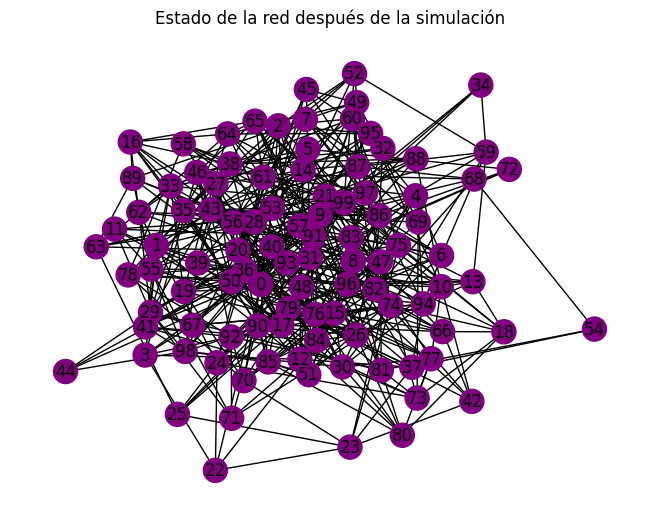

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def initialize_network(num_nodes, initial_infection_rate):
    G = nx.erdos_renyi_graph(num_nodes, 0.1)  # Genera un grafo aleatorio con 100 nodos y una probabilidad de conexión del 0.1
    nx.set_node_attributes(G, {node: False for node in G.nodes()}, 'infected')  # Inicializa todos los nodos como no infectados

    # Infecta aleatoriamente un porcentaje de nodos al inicio
    num_initially_infected = int(num_nodes * initial_infection_rate)
    initially_infected_nodes = random.sample(G.nodes(), num_initially_infected)
    for node in initially_infected_nodes:
        G.nodes[node]['infected'] = True

    return G

def push_and_pull_infection(G):
    # Itera hasta que no haya más cambios en la infección
    while True:
        updated = False
        for node in G.nodes():
            # Nodo infectado trata de infectar a sus vecinos
            if G.nodes[node]['infected']:
                neighbors = list(G.neighbors(node))
                for neighbor in neighbors:
                    if not G.nodes[neighbor]['infected']:
                        G.nodes[neighbor]['infected'] = True
                        updated = True
                        print(f"Nodo {node} infectó a nodo {neighbor}")
            # Nodo no infectado se infecta si tiene al menos un vecino infectado
            else:
                neighbors = list(G.neighbors(node))
                for neighbor in neighbors:
                    if G.nodes[neighbor]['infected']:
                        G.nodes[node]['infected'] = True
                        updated = True
                        print(f"Nodo {neighbor} infectó a nodo {node}")
                        break
        if not updated:
            break

def count_infected_nodes(G):
    infected_nodes = [node for node in G.nodes() if G.nodes[node]['infected']]
    return len(infected_nodes)

def plot_graph(G, infected_nodes):
    pos = nx.spring_layout(G)  # Posiciones de los nodos para el trazado
    nx.draw(G, pos, with_labels=True, node_color=['purple' if node in infected_nodes else 'yellow' for node in G.nodes()])
    plt.title('Estado de la red después de la simulación')
    plt.show()

if __name__ == "__main__":
    num_nodes = 100
    initial_infection_rate = 0.2  # Porcentaje inicial de nodos infectados
    G = initialize_network(num_nodes, initial_infection_rate)

    print("Simulación inicial:")
    print("Nodos infectados:", count_infected_nodes(G))

    push_and_pull_infection(G)

    print("\nSimulación después de la infección:")
    print("Nodos infectados:", count_infected_nodes(G))

# Graficar el estado de la red después de la simulación
plot_graph(G, [node for node in G.nodes() if G.nodes[node]['infected']])